
# Smart Camera 5000
#### Hellen Lima e Victor Barros
<a id="topo"></a>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 4><strong>Projeto Integrado 2016/2 - Apresentação Parcial: </strong></font>

<p><a href="#1a">1a. Importando Dados de Treinamento e Criando o Modelo</a></p>
<p><a href="#1b">1b. Cálculo de Acurácia</a></p>
<p><a href="#1c">1c. Classificando um Novo Dígito</a></p>
<p><a href="#1d">1d. Resposta do Modelo</a></p>
<p></p>
</div>

<hr>

<a id="1a"></a>
# Importando Dados de Treinamento e Criando o Modelo

In [17]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
#training using 11 classes, the last one is random

mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

  # Create the model
x = tf.placeholder(tf.float32, [None, 784])
#W = tf.Variable(tf.random_normal([784, 10], stddev=0.2))
W = tf.Variable(tf.zeros([784, 11]))
b = tf.Variable(tf.zeros([11]))
y = tf.matmul(x, W) + b
#y = tf.nn.softmax(y) no activation function

rand = abs(np.random.normal(0,0.5,(2000,784)))
#mnist_train = np.array(mnist.train.images[0:20000])
mnist_train = np.array(mnist.train.images) #55000 entries
input_x = np.concatenate((mnist_train, rand), axis=0) #57000 entries

  # Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 11])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

label_mnist_last = np.zeros([55000,1])
labels_mnist = np.concatenate((mnist.train.labels, label_mnist_last), axis=1)
labels_rnd = np.concatenate((np.zeros([2000,10]), np.ones([2000,1])), axis=1)
labels = np.concatenate((labels_mnist, labels_rnd), axis=0)

sess = tf.InteractiveSession()

tf.initialize_all_variables().run()
for _ in range(1000):
    batch_xs = input_x
    batch_ys = labels
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="1b"></a>
# Cálculo de Acurácia

In [33]:
#calculating accuracy for test
rand_in_tst = abs(np.random.normal(0,0.5,(1000,784)))
mnist_test = np.array(mnist.test.images)
input_tst = np.concatenate((mnist_test, rand_in_tst), axis=0)

label_mnist_last_tst = np.zeros([10000,1])
labels_mnist_tst = np.concatenate((mnist.test.labels, label_mnist_last_tst), axis=1)
labels_rnd_tst = np.concatenate((np.zeros([1000,10]), np.ones([1000,1])), axis=1)
labels_tst = np.concatenate((labels_mnist_tst, labels_rnd_tst), axis=0)

weights = np.array(sess.run(W))
biases = np.array(sess.run(b))

outputs_test = np.dot(input_tst,weights)+biases

correct_prediction = tf.equal(tf.argmax(outputs_test, 1), tf.argmax(labels_tst, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: %f" % sess.run(accuracy, feed_dict={x:input_tst,
                                      y_: labels_tst}))

Test accuracy: 0.928545


<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="1c"></a>
# Classificando um Novo Dígito

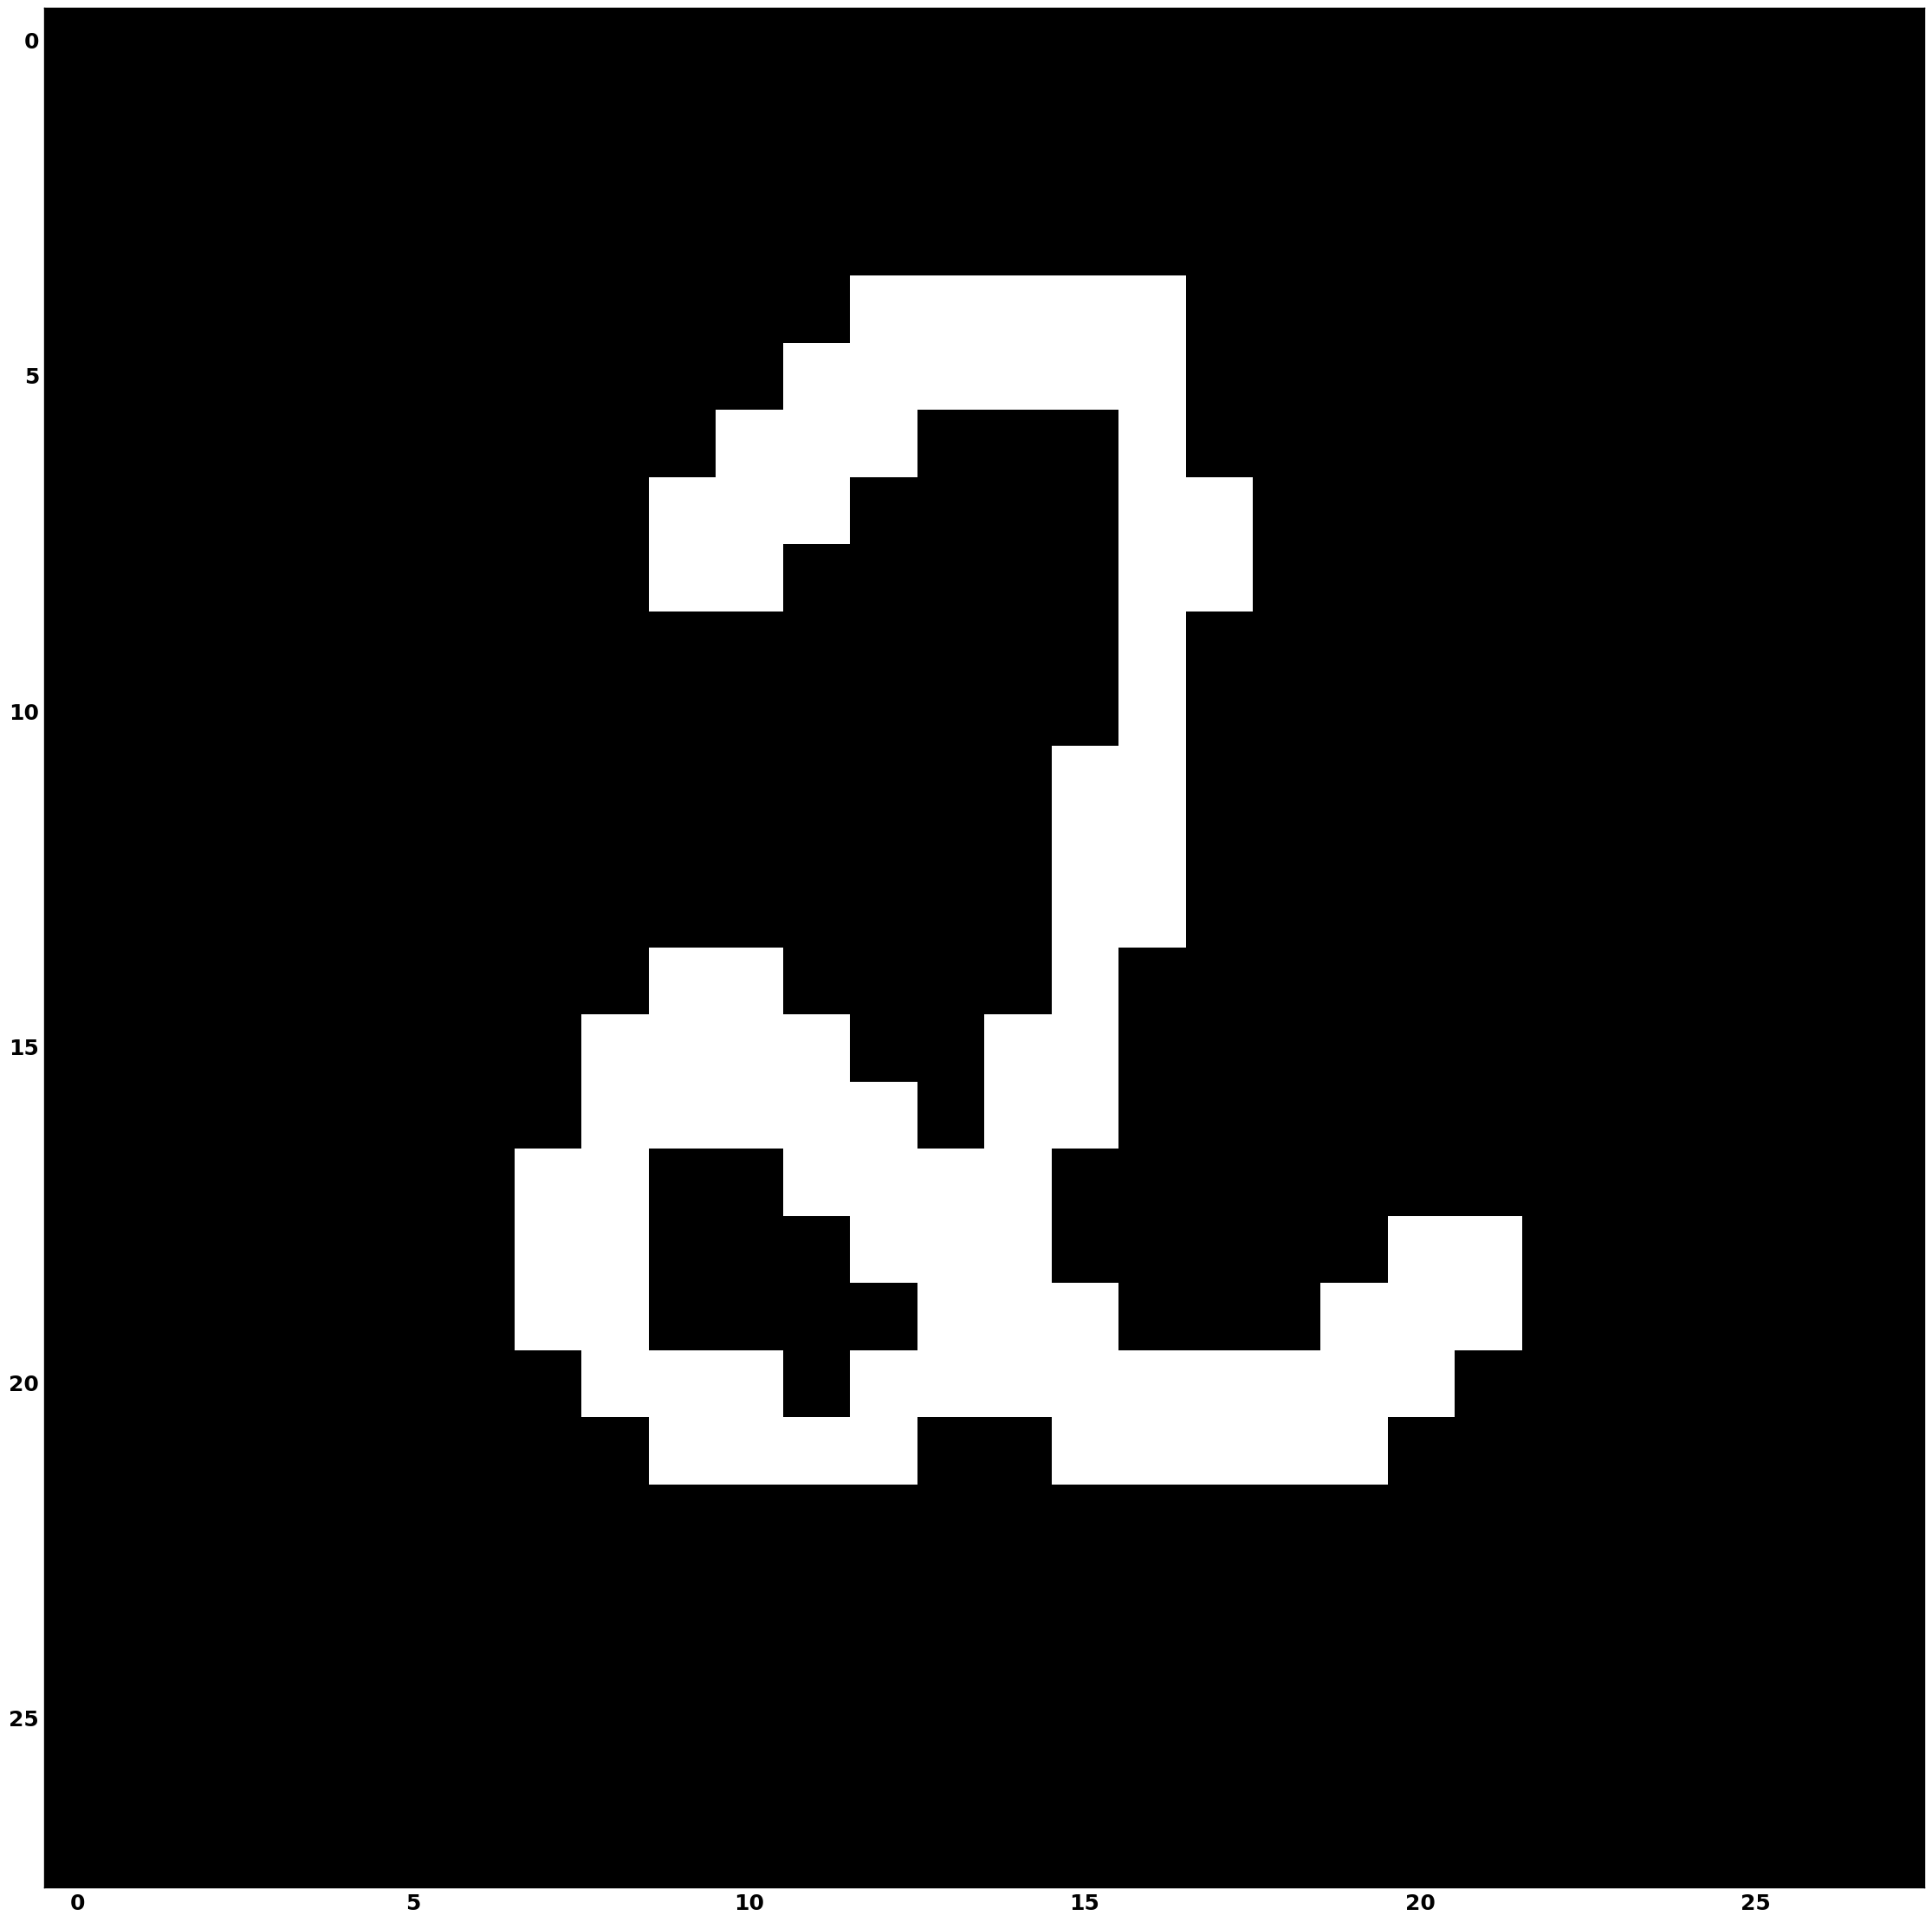

In [38]:
#showing character
import cv2
import numpy as np
img_raw = cv2.imread('mini_test_sample/doisdahellen.jpg',cv2.IMREAD_GRAYSCALE)
img_raw = cv2.resize(img_raw, (28, 28)) 

inv_mat = np.ones([28,28])*255
img_inv = abs(np.subtract(img_raw, inv_mat))
img_inv[img_inv>20] = 255
img_inv[img_inv<20] = 0
img_norm = img_inv/255

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline
fig, ax = plt.subplots(figsize=(28,28),nrows=1, ncols=1)
mnist_test = np.reshape(mnist.test.images[10,:],[28,28])
ax.imshow(img_norm,cmap='gray',interpolation="nearest")

<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="1d"></a>
# Resposta do Modelo

In [39]:
test_in = np.reshape(img_norm,[784,])
out_teste = np.dot(test_in,weights)+biases

rand_inp = np.random.random([1,784])
out_rand = np.dot(rand_inp,weights)+biases

print(out_teste)
print ("Resposta: %d" % out_teste.argmax())

[-2.85514     1.7230419   8.34521124  1.55217362 -1.95213473 -0.22166274
  5.65149886 -6.52919159  1.68465196 -4.55402347 -2.84438915]
Resposta: 2


In [47]:
np.savetxt('weights.txt', weights, fmt='%7.2f')
print(np.shape(weights))

np.savetxt('biases.txt', biases, fmt='%7.2f')
print(np.shape(biases))


(784, 11)
(11,)
